<p style="font-size:36px;text-align:center"> <b>Intrusion Detection System using Machine Learning</b> </p>

<h1>Business Problem</h1>

<h2>Description</h2>

<p>Source:https://www.unb.ca/cic/datasets/nsl.html</p>
        
<h6> Problem statement : </h6>
<p>Given a network connection we should be able to classify it as one of the five classes of attack</p>

<h2>Real-world/Business objectives and constraints.</h2>

* No low-latency requirement.
* Interpretability is important.
* Errors can be very costly.
* Probability of a data-point belonging to each class is needed.

<h1>Machine Learning Problem Formulation</h1>

<h2>Data</h2>

<h3>Data Overview</h3>

- Source: https://www.unb.ca/cic/datasets/nsl.html
- We have two data files: one conatins the train data and the test data 
- Both these data files are have a common columns
- <p> 
    Data file's information:
    <ul> 
        <li>
         Features:'duration' 'protocol_type' 'service' 'flag' 'src_bytes' 'dst_bytes'
        'land' 'wrong_fragment' 'urgent' 'hot' 'num_failed_logins' 'logged_in'
        'num_compromised' 'root_shell' 'su_attempted' 'num_root'
        'num_file_creations' 'num_shells' 'num_access_files' 'num_outbound_cmds'
        'is_host_login' 'is_guest_login' 'count' 'srv_count' 'serror_rate'
        'srv_serror_rate' 'rerror_rate' 'srv_rerror_rate' 'same_srv_rate'
        'diff_srv_rate' 'srv_diff_host_rate' 'dst_host_count'
        'dst_host_srv_count' 'dst_host_same_srv_rate' 'dst_host_diff_srv_rate'
        'dst_host_same_src_port_rate' 'dst_host_srv_diff_host_rate'
        'dst_host_serror_rate' 'dst_host_srv_serror_rate' 'dst_host_rerror_rate'
        'dst_host_srv_rerror_rate' 'attack_type' 
        </li>
    </ul>
</p>

<h2>Mapping the real-world problem to an ML problem</h2>

<h3>Type of Machine Learning Problem</h3>

<p>
    
            There are five different classes of attacksthat a network connection can be classified into => Multi class classification problem
   
      
    
</p>

<h3>Performance Metric</h3>

Metric(s): 
* Multi class log-loss 
* Confusion matrix 
* Precision
* Recall

<h3>Machine Learing Objectives and Constraints</h3>

<p> Objective: Predict the probability of each data-point belonging to each of the five classes.
</p>
<p> Constraints:
</p>
* Interpretability
* Class probabilities are needed.
* Penalize the errors in class probabilites => Metric is Log-loss.
* No Latency constraints.

<h2>Train, CV and Test Datasets</h2>

Split the train file dataset randomly into two parts train, cross validation
and test file dataset as test data respectively

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [2]:
import pandas as pd
df = pd.read_csv(r'C:\Users\anjineyulu\Desktop\amazon_fine_food_reviews\KDDTrain+.csv', header=None)
df.rename(columns={0: 'duration', 1: 'protocol_type',2:'service',3:'flag',4:'src_bytes',5:'dst_bytes',6:'land',7:'wrong_fragment',8:'urgent',9:'hot',10:'num_failed_logins',11:'logged_in',12:'num_compromised',13: 'root_shell', 14: 'su_attempted',15:'num_root',16:'num_file_creations',17:'num_shells',18:'num_access_files',19:'num_outbound_cmds',20:'is_host_login',21:'is_guest_login',22:'count',23:'srv_count',24:'serror_rate',25:'srv_serror_rate',26:'rerror_rate',27:'srv_rerror_rate',28:'same_srv_rate',29:'diff_srv_rate',30:'srv_diff_host_rate',31:'dst_host_count',32:'dst_host_srv_count',33:'dst_host_same_srv_rate',34:'dst_host_diff_srv_rate',35: 'dst_host_same_src_port_rate', 36: 'dst_host_srv_diff_host_rate',37:'dst_host_serror_rate',38:'dst_host_srv_serror_rate',39:'dst_host_rerror_rate',40:'dst_host_srv_rerror_rate',41:'attack_type',42:'dont_know'}, inplace=True)
df.to_csv('train_with_col.csv', index=False) # save to new csv file
print('Number of data points : ', df.shape[0])
print('Number of features : ', df.shape[1])
print('Features : ', df.columns.values)
df.head()

Number of data points :  125973
Number of features :  43
Features :  ['duration' 'protocol_type' 'service' 'flag' 'src_bytes' 'dst_bytes'
 'land' 'wrong_fragment' 'urgent' 'hot' 'num_failed_logins' 'logged_in'
 'num_compromised' 'root_shell' 'su_attempted' 'num_root'
 'num_file_creations' 'num_shells' 'num_access_files' 'num_outbound_cmds'
 'is_host_login' 'is_guest_login' 'count' 'srv_count' 'serror_rate'
 'srv_serror_rate' 'rerror_rate' 'srv_rerror_rate' 'same_srv_rate'
 'diff_srv_rate' 'srv_diff_host_rate' 'dst_host_count'
 'dst_host_srv_count' 'dst_host_same_srv_rate' 'dst_host_diff_srv_rate'
 'dst_host_same_src_port_rate' 'dst_host_srv_diff_host_rate'
 'dst_host_serror_rate' 'dst_host_srv_serror_rate' 'dst_host_rerror_rate'
 'dst_host_srv_rerror_rate' 'attack_type' 'dont_know']


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,dont_know
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [3]:
df.drop('dont_know',axis=1,inplace=True)

In [4]:
import pandas as pd
test_df = pd.read_csv(r'C:\Users\anjineyulu\Desktop\amazon_fine_food_reviews\KDDTest+.csv', header=None)
test_df.rename(columns={0: 'duration', 1: 'protocol_type',2:'service',3:'flag',4:'src_bytes',5:'dst_bytes',6:'land',7:'wrong_fragment',8:'urgent',9:'hot',10:'num_failed_logins',11:'logged_in',12:'num_compromised',13: 'root_shell', 14: 'su_attempted',15:'num_root',16:'num_file_creations',17:'num_shells',18:'num_access_files',19:'num_outbound_cmds',20:'is_host_login',21:'is_guest_login',22:'count',23:'srv_count',24:'serror_rate',25:'srv_serror_rate',26:'rerror_rate',27:'srv_rerror_rate',28:'same_srv_rate',29:'diff_srv_rate',30:'srv_diff_host_rate',31:'dst_host_count',32:'dst_host_srv_count',33:'dst_host_same_srv_rate',34:'dst_host_diff_srv_rate',35: 'dst_host_same_src_port_rate', 36: 'dst_host_srv_diff_host_rate',37:'dst_host_serror_rate',38:'dst_host_srv_serror_rate',39:'dst_host_rerror_rate',40:'dst_host_srv_rerror_rate',41:'attack_type',42:'dont_know'}, inplace=True)
test_df.to_csv('test_with_col.csv', index=False) # save to new csv file
print('Number of data points : ', test_df.shape[0])
print('Number of features : ', test_df.shape[1])
print('Features : ', test_df.columns.values)
test_df.head()

Number of data points :  22544
Number of features :  43
Features :  ['duration' 'protocol_type' 'service' 'flag' 'src_bytes' 'dst_bytes'
 'land' 'wrong_fragment' 'urgent' 'hot' 'num_failed_logins' 'logged_in'
 'num_compromised' 'root_shell' 'su_attempted' 'num_root'
 'num_file_creations' 'num_shells' 'num_access_files' 'num_outbound_cmds'
 'is_host_login' 'is_guest_login' 'count' 'srv_count' 'serror_rate'
 'srv_serror_rate' 'rerror_rate' 'srv_rerror_rate' 'same_srv_rate'
 'diff_srv_rate' 'srv_diff_host_rate' 'dst_host_count'
 'dst_host_srv_count' 'dst_host_same_srv_rate' 'dst_host_diff_srv_rate'
 'dst_host_same_src_port_rate' 'dst_host_srv_diff_host_rate'
 'dst_host_serror_rate' 'dst_host_srv_serror_rate' 'dst_host_rerror_rate'
 'dst_host_srv_rerror_rate' 'attack_type' 'dont_know']


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,dont_know
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [5]:
test_df.drop('dont_know',axis=1,inplace=True)

In [6]:
df.rename(columns={'attack_type':'label'},inplace=True)

In [7]:
test_df.rename(columns={'attack_type':'label'},inplace=True)

In [8]:
df_categorical_variables_train =df[['protocol_type','service','flag']]
df_categorical_variables_test =test_df[['protocol_type','service','flag']]

In [9]:
df_categorical_variables_train.head(5)

,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF


In [10]:
print(df.shape)
print(test_df.shape)

(125973, 42)
(22544, 42)


In [11]:
df_cat_en=OneHotEncoder().fit_transform(df_categorical_variables_train)

In [12]:
test_df_cat_en=OneHotEncoder().fit_transform(df_categorical_variables_test)

In [13]:
protocol_types=sorted(df.protocol_type.unique())
service_types=sorted(df.service.unique())
flag_types=sorted(df.flag.unique())

In [14]:
len(flag_types)

11

In [15]:
test_flag_types=sorted(test_df.flag.unique())
len(test_flag_types)

11

In [16]:
print(len(protocol_types))
test_protocol_types=sorted(test_df.protocol_type.unique())
print(test_protocol_types)

3
['icmp', 'tcp', 'udp']


In [17]:
len(service_types)

70

In [18]:
string_prot='protocol_'
protocol_cat_names=[string_prot+i for i in protocol_types]
string_service='service_'
service_cat_names=[string_service+i for i in service_types]
string_flag='flag'
flag_cat_names=[string_flag+i for i in flag_types]

In [19]:
service_types_test=sorted(test_df.service.unique())
service_cat_names_test=[string_service+i for i in service_types_test]

In [20]:
train_cols=protocol_cat_names+service_cat_names+flag_cat_names
test_cols=protocol_cat_names+service_cat_names_test+flag_cat_names

In [21]:
print(len(train_cols))
print(len(test_cols))

84
78


In [22]:
len(train_cols)

84

In [23]:
len(test_cols)

78

In [24]:
df_categorical_data=pd.DataFrame(df_cat_en.toarray(),columns=train_cols)
test_df_categorical_data=pd.DataFrame(test_df_cat_en.toarray(),columns=test_cols)

In [25]:
train_s=df['service'].tolist()
test_s=test_df['service'].tolist()
difference=list(set(train_s)-set(test_s))

In [26]:
difference

['aol', 'red_i', 'http_2784', 'http_8001', 'urh_i', 'harvest']

In [27]:
service_extra='service_'
difference=[service_extra+i for i in difference]

In [28]:
for i in difference:
    test_df_categorical_data[i]=0

In [29]:
test_df_categorical_data.shape

(22544, 84)

In [30]:
df_categorical_data.shape

(125973, 84)

In [31]:
df=df.join(df_categorical_data)
test_df=test_df.join(test_df_categorical_data)

In [32]:
df.drop('protocol_type',axis=1,inplace=True)
df.drop('service',axis=1,inplace=True)
df.drop('flag',axis=1,inplace=True)

In [33]:
test_df.drop('protocol_type',axis=1,inplace=True)
test_df.drop('service',axis=1,inplace=True)
test_df.drop('flag',axis=1,inplace=True)

In [34]:
print(df.shape)
print(test_df.shape)

(125973, 123)
(22544, 123)


In [35]:
df.columns.values

array(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in',
       'num_compromised', 'root_shell', 'su_attempted', 'num_root',
       'num_file_creations', 'num_shells', 'num_access_files',
       'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'label',
       'protocol_icmp', 'protocol_tcp', 'protocol_udp', 'service_IRC',
       'service_X11', 'service_Z39_50', 'service_aol', 'service_auth',
       'service_bgp', 'service_courier', 'service_csnet_ns',
       'serv

In [36]:
test_df.columns.values

array(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in',
       'num_compromised', 'root_shell', 'su_attempted', 'num_root',
       'num_file_creations', 'num_shells', 'num_access_files',
       'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'label',
       'protocol_icmp', 'protocol_tcp', 'protocol_udp', 'service_IRC',
       'service_X11', 'service_Z39_50', 'service_auth', 'service_bgp',
       'service_courier', 'service_csnet_ns', 'service_ctf',
       'serv

In [37]:
a=set(df.columns.values)-set(test_df.columns.values)

In [38]:
print(a)

set()


In [39]:
df['label'].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64

In [40]:
test_df['label'].value_counts()

normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       178
portsweep           157
ipsweep             141
httptunnel          133
nmap                 73
pod                  41
buffer_overflow      20
multihop             18
named                17
ps                   15
sendmail             14
rootkit              13
xterm                13
teardrop             12
xlock                 9
land                  7
xsnoop                4
ftp_write             3
perl                  2
sqlattack             2
udpstorm              2
loadmodule            2
phf                   2
worm                  2
imap                  1
Name: label, dtype: int64

In [41]:
df.drop('num_outbound_cmds',axis=1,inplace=True)
test_df.drop('num_outbound_cmds',axis=1,inplace=True)

In [42]:
%%time
for i, attack in enumerate(df.label):
            if attack=='neptune' or attack=='back' or attack=='land'or attack=='pod' or attack=='smurf' or attack=='teardrop' or attack=='apache2' or attack=='udpstorm' or attack=='processtable' or attack=='worm' or attack=='mailbomb':
                   df.label[i]='DoS'
            elif attack=='satan' or attack=='ipsweep' or attack=='nmap'or attack=='portsweep' or attack=='mscan' or attack=='saint':
                   df.label[i]='Probe'
            elif attack=='guess_passwd' or attack=='ftp_write' or attack=='imap'or attack=='phf' or attack=='multihop' or attack=='warezmaster' or attack=='warezclient' or attack=='spy' or attack=='xlock' or attack=='xsnoop' or attack=='snmpguess' or attack=='snmpgetattack' or attack=='httptunnel' or attack=='sendmail' or attack=='named':
                   df.label[i]='R2L'
            elif attack=='buffer_overflow' or attack=='loadmodule' or attack=='rootkit'or attack=='perl' or attack=='sqlattack' or attack=='xterm' or attack=='ps':
                   df.label[i]='U2R'

C:\Users\anjineyulu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\anjineyulu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\anjineyulu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.htm

Wall time: 52min 36s


In [43]:
%%time
for i, attack in enumerate(test_df.label):
            if attack=='neptune' or attack=='back' or attack=='land'or attack=='pod' or attack=='smurf' or attack=='teardrop' or attack=='apache2' or attack=='udpstorm' or attack=='processtable' or attack=='worm' or attack=='mailbomb':
                   test_df.label[i]='DoS'
            elif attack=='satan' or attack=='ipsweep' or attack=='nmap'or attack=='portsweep' or attack=='mscan' or attack=='saint':
                   test_df.label[i]='Probe'
            elif attack=='guess_passwd' or attack=='ftp_write' or attack=='imap'or attack=='phf' or attack=='multihop' or attack=='warezmaster' or attack=='warezclient' or attack=='spy' or attack=='xlock' or attack=='xsnoop' or attack=='snmpguess' or attack=='snmpgetattack' or attack=='httptunnel' or attack=='sendmail' or attack=='named':
                   test_df.label[i]='R2L'
            elif attack=='buffer_overflow' or attack=='loadmodule' or attack=='rootkit'or attack=='perl' or attack=='sqlattack' or attack=='xterm' or attack=='ps':
                   test_df.label[i]='U2R'

C:\Users\anjineyulu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\anjineyulu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\anjineyulu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#index

Wall time: 12min 50s


In [44]:
df['label'][df['label']=='normal']=0
df['label'][df['label']=='DoS']=1
df['label'][df['label']=='R2L']=2
df['label'][df['label']=='Probe']=3
df['label'][df['label']=='U2R']=4

C:\Users\anjineyulu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\anjineyulu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\anjineyulu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is sepa

In [51]:
df['label'].value_counts()

0    67343
1    45927
3    11656
2      995
4       52
Name: label, dtype: int64

In [52]:
test_df['label'][test_df['label']=='normal']=0
test_df['label'][test_df['label']=='DoS']=1
test_df['label'][test_df['label']=='R2L']=2
test_df['label'][test_df['label']=='Probe']=3
test_df['label'][test_df['label']=='U2R']=4

C:\Users\anjineyulu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\anjineyulu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\anjineyulu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is sepa

In [53]:
test_df['label'].value_counts()

0    9711
1    7460
2    2885
3    2421
4      67
Name: label, dtype: int64

In [54]:
test_df[test_df['label']==4].shape

(67, 122)

In [55]:
df_dos_train=df[ (df['label']==1) |(df['label']==0)]
df_r2l_train=df[(df['label']==2) | (df['label']==0)]
df_probe_train=df[(df['label']==3) | (df['label']==0)]
df_u2r_train=df[(df['label']==4) | (df['label']==0)]

In [58]:
df_dos_test=test_df[(test_df['label']==1) | (test_df['label']==0)]
df_r2l_test=test_df[(test_df['label']==2) | (test_df['label']==0)]
df_probe_test=test_df[(test_df['label']==3) | (test_df['label']==0)]
df_u2r_test=test_df[(test_df['label']==4) | (test_df['label']==0)]
#df_u2r_test=test_df[(test_df['label']==4 | (test_df['label']==0)]

#Reference:https://github.com/CynthiaKoopman/Network-Intrusion-Detection/blob/master/DecisionTree_IDS.ipynb

In [59]:
df_dos_train_y=df_dos_train['label']
df_dos_train.drop('label',axis=1,inplace=True)
df_dos_train_x=df_dos_train

df_r2l_train_y=df_r2l_train['label']
df_r2l_train.drop('label',axis=1,inplace=True)
df_r2l_train_x=df_r2l_train

df_probe_train_y=df_probe_train['label']
df_probe_train.drop('label',axis=1,inplace=True)
df_probe_train_x=df_probe_train

df_u2r_train_y=df_u2r_train['label']
df_u2r_train.drop('label',axis=1,inplace=True)
df_u2r_train_x=df_u2r_train

C:\Users\anjineyulu\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [60]:
df_dos_test_y=df_dos_test['label']
df_dos_test.drop('label',axis=1,inplace=True)
df_dos_test_x=df_dos_test

df_r2l_test_y=df_r2l_test['label']
df_r2l_test.drop('label',axis=1,inplace=True)
df_r2l_test_x=df_r2l_test

df_probe_test_y=df_probe_test['label']
df_probe_test.drop('label',axis=1,inplace=True)
df_probe_test_x=df_probe_test

df_u2r_test_y=df_u2r_test['label']
df_u2r_test.drop('label',axis=1,inplace=True)
df_u2r_test_x=df_u2r_test

C:\Users\anjineyulu\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [61]:
df_r2l_train_x.head(5)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flagREJ,flagRSTO,flagRSTOS0,flagRSTR,flagS0,flagS1,flagS2,flagS3,flagSF,flagSH
0,0,491,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,146,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,232,8153,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,199,420,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12,0,287,2251,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [62]:
df_r2l_train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flagREJ,flagRSTO,flagRSTOS0,flagRSTR,flagS0,flagS1,flagS2,flagS3,flagSF,flagSH
count,68338.000000,6.833800e+04,6.833800e+04,68338.000000,68338.0,68338.000000,68338.000000,68338.000000,68338.000000,68338.000000,...,68338.000000,68338.000000,68338.0,68338.000000,68338.000000,68338.000000,68338.000000,68338.000000,68338.000000,68338.000000
mean,175.355307,1.742256e+04,5.457972e+03,0.000102,0.0,0.000190,0.348649,0.002180,0.713600,0.500819,...,0.039407,0.003878,0.0,0.002210,0.005180,0.005297,0.001756,0.000702,0.941321,0.000088
std,1323.789323,4.415764e+05,1.003994e+05,0.010120,0.0,0.019126,2.901707,0.059345,0.452082,32.504604,...,0.194563,0.062151,0.0,0.046955,0.071787,0.072589,0.041868,0.026494,0.235024,0.009370
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.410000e+02,8.800000e+01,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,2.350000e+02,3.730000e+02,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,3.270000e+02,2.073000e+03,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,40504.000000,8.958152e+07,7.028652e+06,1.000000,0.0,3.000000,77.000000,5.000000,1.000000,7479.000000,...,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [63]:
from sklearn import preprocessing
scaler1 = preprocessing.StandardScaler().fit(df_dos_train_x)
df_dos_train_x=scaler1.transform(df_dos_train_x) 
scaler2 = preprocessing.StandardScaler().fit(df_probe_train_x)
df_probe_train_x=scaler2.transform(df_probe_train_x) 
scaler3 = preprocessing.StandardScaler().fit(df_r2l_train_x)
df_r2l_train_x=scaler3.transform(df_r2l_train_x) 
scaler4 = preprocessing.StandardScaler().fit(df_u2r_train_x)
df_u2r_train_x=scaler4.transform(df_u2r_train_x) 
# test data
scaler5 = preprocessing.StandardScaler().fit(df_dos_test_x)
df_dos_test_x=scaler5.transform(df_dos_test_x) 
scaler6 = preprocessing.StandardScaler().fit(df_probe_test_x)
df_probe_test_x=scaler6.transform(df_probe_test_x) 
scaler7 = preprocessing.StandardScaler().fit(df_r2l_test_x)
df_r2l_test_x=scaler7.transform(df_r2l_test_x) 
scaler8 = preprocessing.StandardScaler().fit(df_u2r_test_x)
df_u2r_test_x=scaler8.transform(df_u2r_test_x)

C:\Users\anjineyulu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\anjineyulu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\anjineyulu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\anjineyulu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """
C:\U

In [65]:
from sklearn.tree import DecisionTreeClassifier
dt_dos=DecisionTreeClassifier()
dt_dos.fit(df_dos_train_x,df_dos_train_y.astype('int'))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [66]:
df_dos_train_y.value_counts()

0    67343
1    45927
Name: label, dtype: int64

In [67]:
y_dos_pred=dt_dos.predict(df_dos_test_x)

In [68]:
pd.crosstab(df_dos_test_y,y_dos_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,9499,212
1,2830,4630


In [72]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(df_dos_test_y.astype('int'),y_dos_pred)

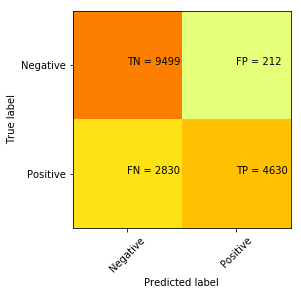

In [73]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [74]:
from sklearn.tree import DecisionTreeClassifier
dt_probe=DecisionTreeClassifier()
dt_probe.fit(df_probe_train_x,df_probe_train_y.astype('int'))
y_probe_pred=dt_probe.predict(df_probe_test_x)

In [75]:
cm=confusion_matrix(df_probe_test_y.astype('int'),y_probe_pred)

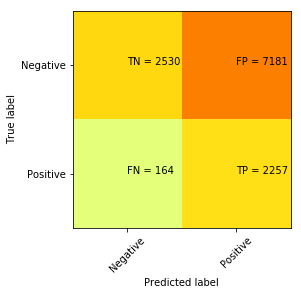

In [76]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [77]:
dt_r2l=DecisionTreeClassifier()
dt_r2l.fit(df_r2l_train_x,df_r2l_train_y.astype('int'))
y_r2l_pred=dt_r2l.predict(df_r2l_test_x)

In [78]:
cm=confusion_matrix(df_r2l_test_y.astype('int'),y_r2l_pred)

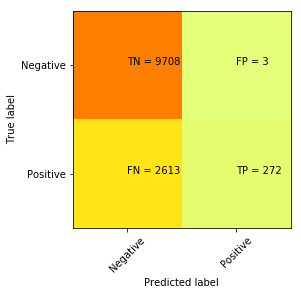

In [79]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [80]:
dt_u2r=DecisionTreeClassifier()
dt_u2r.fit(df_u2r_train_x,df_u2r_train_y.astype('int'))
y_u2r_pred=dt_u2r.predict(df_u2r_test_x)

In [81]:
cm=confusion_matrix(df_u2r_test_y.astype('int'),y_u2r_pred)

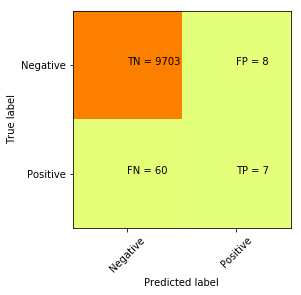

In [82]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [86]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
accuracy = cross_val_score(dt_dos,df_dos_test_x,df_dos_test_y.astype('int'), cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(dt_dos,df_dos_test_x,df_dos_test_y.astype('int'), cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(dt_dos,df_dos_test_x,df_dos_test_y.astype('int'), cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(dt_dos,df_dos_test_x,df_dos_test_y.astype('int'), cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99651 (+/- 0.00281)
Precision: 0.99506 (+/- 0.00461)
Recall: 0.99665 (+/- 0.00468)
F-measure: 0.99605 (+/- 0.00341)


In [88]:
print(type(df_dos_test_y))

<class 'pandas.core.series.Series'>


In [94]:
df_probe_test_y.replace(to_replace =3, 
                 value =1,inplace=True) 

C:\Users\anjineyulu\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5886: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [95]:
accuracy = cross_val_score(dt_probe,df_probe_test_x,df_probe_test_y.astype('int'), cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(dt_probe,df_probe_test_x,df_probe_test_y.astype('int'), cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(dt_probe,df_probe_test_x,df_probe_test_y.astype('int'), cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(dt_probe,df_probe_test_x,df_probe_test_y.astype('int'), cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99571 (+/- 0.00441)
Precision: 0.99131 (+/- 0.01133)
Recall: 0.98885 (+/- 0.00982)
F-measure: 0.98905 (+/- 0.00906)


In [107]:
df_r2l_test_y.replace(to_replace =2, 
                 value =1,inplace=True) 

C:\Users\anjineyulu\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5886: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [108]:
accuracy = cross_val_score(dt_r2l,df_r2l_test_x,df_r2l_test_y.astype('int'), cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(dt_r2l,df_r2l_test_x,df_r2l_test_y.astype('int'), cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(dt_r2l,df_r2l_test_x,df_r2l_test_y.astype('int'), cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(dt_r2l,df_r2l_test_x,df_r2l_test_y.astype('int'), cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.97967 (+/- 0.01060)
Precision: 0.95832 (+/- 0.03059)
Recall: 0.95251 (+/- 0.01989)
F-measure: 0.95495 (+/- 0.01992)


In [105]:
df_u2r_test_y.replace(to_replace =4, 
                 value =1,inplace=True) 

C:\Users\anjineyulu\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5886: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [106]:
accuracy = cross_val_score(dt_u2r,df_u2r_test_x,df_u2r_test_y.astype('int'), cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(dt_u2r,df_u2r_test_x,df_u2r_test_y.astype('int'), cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(dt_u2r,df_u2r_test_x,df_u2r_test_y.astype('int'), cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(dt_u2r,df_u2r_test_x,df_u2r_test_y.astype('int'), cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99683 (+/- 0.00309)
Precision: 0.80147 (+/- 0.25968)
Recall: 0.83571 (+/- 0.21344)
F-measure: 0.80973 (+/- 0.12163)
